# NOT-gate model

In [3]:
import matplotlib.pyplot as plt
import torch

In [5]:
x_train = torch.tensor([[1], [0]]).float()
y_train = torch.tensor([[0], [1]]).float()

In [34]:
class SigmoidModel:
    def __init__(self):
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    def logits(self, x):
        return x @ self.W + self.b

    def f(self, x):
        return torch.sigmoid(self.logits(x))

    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)

In [40]:
model = SigmoidModel()
optimizer = torch.optim.SGD([model.W, model.b], 0.01)

for epoch in range(100_000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

print("W = \t%s\nb = \t%s\nLoss = \t%s" % (model.W, model.b, model.loss(x_train, y_train)))

W = 	tensor([[-10.5929]], requires_grad=True)
b = 	tensor([[5.0925]], requires_grad=True)
Loss = 	tensor(0.0051, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


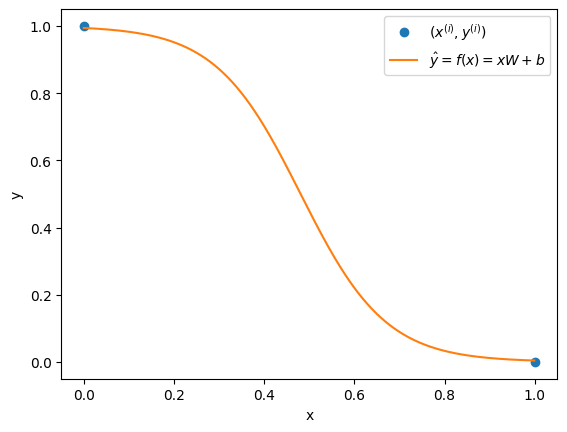

In [41]:
plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.arange(0, 1, 0.001).reshape(-1,1)
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = xW+b$')
plt.legend()
plt.show()